# Question 1 : Data Import & Cleaning Data

## Importing Data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df_eco = pd.read_excel("C:/Users/Utilisateur/OneDrive/Documents/RENNES SB/COURS/PROGRAMMING/World_Economic_Report_2022_.xlsx")

In [102]:
df_happ = pd.read_csv("C:/Users/Utilisateur/OneDrive/Documents/RENNES SB/COURS/PROGRAMMING/Word_Happiness_report_2022_.csv")

In [103]:
df_eco.head()

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,GDP_Billions_PPP,Unemployment_Rate,Inflation_Rate,Public_Debt_rate_GDP
0,1,Afghanistan,Asia-Pacific,0.0,Step4,80.3,49.2,76.7,10.0,35.5,69.6,8.8,5.0,7.3
1,2,Albania,Europe,1.0,Step1,73.9,69.3,81.5,70.0,2.9,36.0,13.9,2.0,71.2
2,3,Algeria,Middle East and North Africa,0.0,Step4,48.7,61.6,74.9,30.0,41.5,632.9,10.0,5.6,25.8
3,4,Angola,Sub-Saharan Africa,0.0,Step4,80.7,55.7,55.4,30.0,28.2,190.3,8.2,31.7,65.3
4,5,Argentina,Americas,0.0,Step2,49.5,56.4,60.2,55.0,44.1,920.2,8.7,25.7,52.6


In [104]:
df_happ.head()

,Unnamed: 0,index,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## b) Cleaning Data

### DF_ECO

For columns of type 'object' we replace the missing value by the mode.
For columns of type 'integer' or 'float', we replace the missing value by the mean by regions because depending on the region in the world, the business freedom or the money freedom is not the same. There is inequalities between countries and regions.

In [105]:
df_eco.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IFM_Nigo                2
Step_Nego               3
Gov_Spending            2
Business_Freedom        1
Monetary_Freedom        1
Investment_Freedom      1
Population_Millions     0
GDP_Billions_PPP        0
Unemployment_Rate       1
Inflation_Rate          1
Public_Debt_rate_GDP    0
dtype: int64

In [106]:
df_eco.select_dtypes(include = "object").columns 

Index(['Country', 'Region', 'Step_Nego'], dtype='object')

In [107]:
# For columns of type 'object' we replace the missing value by the mode.
for col in df_eco.select_dtypes(include = "object").columns :
    df_eco[col] = df_eco[col].fillna(df_eco[col].mode().iloc[0])

In [108]:
#For binary column : IFM_Nigo
df_eco['IFM_Nigo'] = df_eco['IFM_Nigo'].fillna(df_eco['IFM_Nigo'].mode().iloc[0])

In [109]:
#for columns of type 'integer' or 'float', we replace the missing value by the mean by regions
for col in df_eco.select_dtypes(include=["float", "int"]).columns :
    for s in df_eco["Region"].unique():
        dfs = df_eco.loc[(df_eco['Region'] ==s)]
        df_eco.loc[(df_eco['Region'] == s) & (df_eco[col].isnull()), col]= dfs[col].mean()

In [110]:
df_eco.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IFM_Nigo                0
Step_Nego               0
Gov_Spending            0
Business_Freedom        0
Monetary_Freedom        0
Investment_Freedom      0
Population_Millions     0
GDP_Billions_PPP        0
Unemployment_Rate       0
Inflation_Rate          0
Public_Debt_rate_GDP    0
dtype: int64

### DF_HAPP

We replace the missing value by the mean of each column.

In [111]:
df_happ.isnull().sum()

Unnamed: 0                      0
index                           0
Overall rank                    0
Country                         0
Score                           0
GDP per capita                  1
Social support                  0
Healthy life expectancy         4
Freedom to make life choices    0
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [112]:
for col in df_happ.iloc[:,5:].columns :
    df_happ[col] = df_happ[col].fillna(df_happ[col].mode().iloc[0])

In [113]:
df_happ.isnull().sum()

Unnamed: 0                      0
index                           0
Overall rank                    0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Question 2 : Data Manipulation

## a) DataFrame Manipulation

### df

In [114]:
df_eco.head()

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,GDP_Billions_PPP,Unemployment_Rate,Inflation_Rate,Public_Debt_rate_GDP
0,1.0,Afghanistan,Asia-Pacific,0.0,Step4,80.3,49.2,76.7,10.0,35.5,69.6,8.8,5.0,7.3
1,2.0,Albania,Europe,1.0,Step1,73.9,69.3,81.5,70.0,2.9,36.0,13.9,2.0,71.2
2,3.0,Algeria,Middle East and North Africa,0.0,Step4,48.7,61.6,74.9,30.0,41.5,632.9,10.0,5.6,25.8
3,4.0,Angola,Sub-Saharan Africa,0.0,Step4,80.7,55.7,55.4,30.0,28.2,190.3,8.2,31.7,65.3
4,5.0,Argentina,Americas,0.0,Step2,49.5,56.4,60.2,55.0,44.1,920.2,8.7,25.7,52.6


In [115]:
df_happ.head()

,Unnamed: 0,index,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [116]:
df = df_eco.merge(df_happ,on='Country')

In [117]:
df

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,...,Unnamed: 0,index,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.0,Afghanistan,Asia-Pacific,0.0,Step4,80.300000,49.2,76.7,10.0,35.5,...,153,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,2.0,Albania,Europe,1.0,Step1,73.900000,69.3,81.5,70.0,2.9,...,106,106,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,3.0,Algeria,Middle East and North Africa,0.0,Step4,48.700000,61.6,74.9,30.0,41.5,...,87,87,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,5.0,Argentina,Americas,0.0,Step2,49.500000,56.4,60.2,55.0,44.1,...,46,46,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,6.0,Armenia,Europe,1.0,Step2,45.211905,78.3,77.8,75.0,3.0,...,115,115,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,169.0,Uzbekistan,Asia-Pacific,0.0,Step2,67.400000,72.5,58.9,10.0,32.1,...,40,40,41,6.174,0.745,1.529,0.756,0.631,0.322,0.240
133,171.0,Venezuela,Americas,0.0,Step2,58.100000,33.9,10.0,2.0,31.4,...,107,107,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047
134,172.0,Vietnam,Asia-Pacific,0.0,Step2,74.100000,63.5,68.9,30.0,93.6,...,93,93,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073
135,173.0,Zambia,Sub-Saharan Africa,0.0,Step4,80.100000,71.1,70.3,55.0,17.2,...,137,137,138,4.107,0.578,1.058,0.426,0.431,0.247,0.087


In [118]:
df[df['Country']=='Finland']

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,...,Unnamed: 0,index,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
41,58.0,Finland,Europe,1.0,Step3,7.2,89.4,84.8,85.0,5.5,...,0,0,1,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [119]:
df.shape

(137, 24)

### df_E

In [173]:
df_happ['Country'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [174]:
df_eco['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros',
       'Congo, Democratic Republic of the Congo', 'Congo, Republic of',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Hait

In [180]:
for country in df_eco['Country'] :
    print(country)

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo, Democratic Republic of the Congo
Congo, Republic of
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kuwait
Kyrgyz Republic
Laos
Latvia
Lebanon
Lesotho
Liberia
Lithuania
Luxembourg
Macau
Macedonia
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mong

In [181]:
for countryt in df_happ['Country'] :
    print(countryt)

Finland
Denmark
Norway
Iceland
Netherlands
Switzerland
Sweden
New Zealand
Canada
Austria
Australia
Costa Rica
Israel
Luxembourg
United Kingdom
Ireland
Germany
Belgium
United States
Czech Republic
United Arab Emirates
Malta
Mexico
France
Taiwan
Chile
Guatemala
Saudi Arabia
Qatar
Spain
Panama
Brazil
Uruguay
Singapore
El Salvador
Italy
Bahrain
Slovakia
Trinidad & Tobago
Poland
Uzbekistan
Lithuania
Colombia
Slovenia
Nicaragua
Kosovo
Argentina
Romania
Cyprus
Ecuador
Kuwait
Thailand
Latvia
South Korea
Estonia
Jamaica
Mauritius
Japan
Honduras
Kazakhstan
Bolivia
Hungary
Paraguay
Northern Cyprus
Peru
Portugal
Pakistan
Russia
Philippines
Serbia
Moldova
Libya
Montenegro
Tajikistan
Croatia
Hong Kong
Dominican Republic
Bosnia and Herzegovina
Turkey
Malaysia
Belarus
Greece
Mongolia
North Macedonia
Nigeria
Kyrgyzstan
Turkmenistan
Algeria
Morocco
Azerbaijan
Lebanon
Indonesia
China
Vietnam
Bhutan
Cameroon
Bulgaria
Ghana
Ivory Coast
Nepal
Jordan
Benin
Congo (Brazzaville)
Gabon
Laos
South Africa
Albania


## b )Data Manipulation

In [182]:
df_eco.head()

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,GDP_Billions_PPP,Unemployment_Rate,Inflation_Rate,Public_Debt_rate_GDP,unique
0,1.0,Afghanistan,Asia-Pacific,0.0,Step4,80.3,49.2,76.7,10.0,35.5,69.6,8.8,5.0,7.3,1
1,2.0,Albania,Europe,1.0,Step1,73.9,69.3,81.5,70.0,2.9,36.0,13.9,2.0,71.2,1
2,3.0,Algeria,Middle East and North Africa,0.0,Step4,48.7,61.6,74.9,30.0,41.5,632.9,10.0,5.6,25.8,1
3,4.0,Angola,Sub-Saharan Africa,0.0,Step4,80.7,55.7,55.4,30.0,28.2,190.3,8.2,31.7,65.3,1
4,5.0,Argentina,Americas,0.0,Step2,49.5,56.4,60.2,55.0,44.1,920.2,8.7,25.7,52.6,1


In [200]:
df_eco.groupby(['Region'])[['Unemployment_Rate','Inflation_Rate']].min()

,Unemployment_Rate,Inflation_Rate
Region,,
Americas,2.6,0.1
Asia-Pacific,0.2,-0.4
Europe,0.5,0.3
Middle East and North Africa,0.1,-0.9
Sub-Saharan Africa,0.4,-0.9


In [209]:
for r in df_eco['Region'].unique() :
    print(r)
    print(df_eco[df_eco['Region']==r][['Unemployment_Rate','Inflation_Rate']].min().to_frame())

Asia-Pacific
                     0
Unemployment_Rate  0.2
Inflation_Rate    -0.4
Europe
                     0
Unemployment_Rate  0.5
Inflation_Rate     0.3
Middle East and North Africa
                     0
Unemployment_Rate  0.1
Inflation_Rate    -0.9
Sub-Saharan Africa
                     0
Unemployment_Rate  0.4
Inflation_Rate    -0.9
Americas
                     0
Unemployment_Rate  2.6
Inflation_Rate     0.1


In [276]:
def top_country(col) :
    if df[col].dtype == 'float' or df[col].dtype == 'int' :
        print(df[[col,'Country','Population_Millions','Step_Nego', 'Social support']].sort_values(col,ascending=False).head(5))
    else :
        None
top_country('Business_Freedom')

     Business_Freedom         Country  Population_Millions Step_Nego  \
53               96.4       Hong Kong                  7.4     Step2   
129              92.9  United Kingdom                 66.1     Step2   
91               91.0     New Zealand                  4.8     Step3   
111              90.8       Singapore                  5.6     Step1   
34               90.7         Denmark                  5.7     Step2   

     Social support  
53            1.277  
129           1.538  
91            1.557  
111           1.463  
34            1.573  


# Question 3

Region           mean                    \
                                Inflation_Rate Unemployment_Rate   
0                      Americas      39.587097          7.800000   
1                  Asia-Pacific       3.707500          4.007692   
2                        Europe       2.402381          8.772093   
3  Middle East and North Africa       4.221429          7.071429   
4            Sub-Saharan Africa       7.378261          8.467391   

            amax                    
  Inflation_Rate Unemployment_Rate  
0         1087.5              21.0  
1           13.0              10.3  
2           14.4              25.6  
3           23.5              15.4  
4           41.5              27.3

In [277]:
mean = df.groupby('Region')['Unemployment_Rate'].mean()
mean

Region
Americas                        6.518182
Asia-Pacific                    4.034615
Europe                          8.447619
Middle East and North Africa    7.361538
Sub-Saharan Africa              8.114706
Name: Unemployment_Rate, dtype: float64

In [278]:
max = df.groupby('Region')['Inflation_Rate'].max()
max

Region
Americas                        1087.5
Asia-Pacific                      13.0
Europe                            14.4
Middle East and North Africa      23.5
Sub-Saharan Africa                18.0
Name: Inflation_Rate, dtype: float64

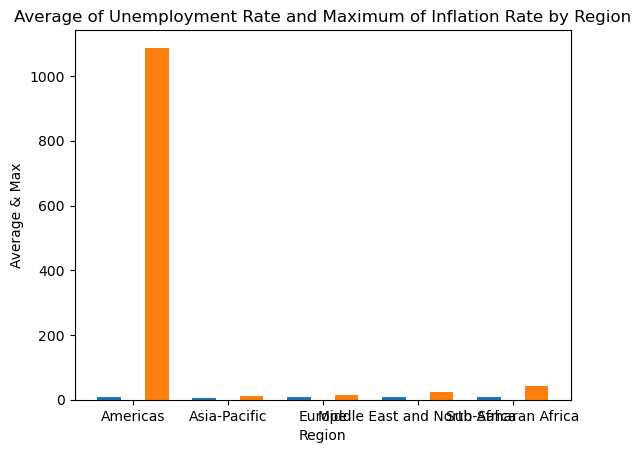

In [251]:
plt.bar([i[0]-0.25 for i in enumerate(max.index)],mean,0.25)
plt.bar([i[0]+0.25 for i in enumerate(max.index)],max,0.25)
plt.xticks(np.arange(len(max.index)),max.index.tolist())

plt.title('Average of Unemployment Rate and Maximum of Inflation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average & Max')
plt.show()

In [279]:
max_govspend = pd.pivot_table(df, values = ['Gov_Spending'], index = ['Step_Nego'], aggfunc = np.max).reset_index()
max_govspend

,Step_Nego,Gov_Spending
0,Step1,95.6
1,Step2,91.4
2,Step3,92.0
3,Step4,96.5


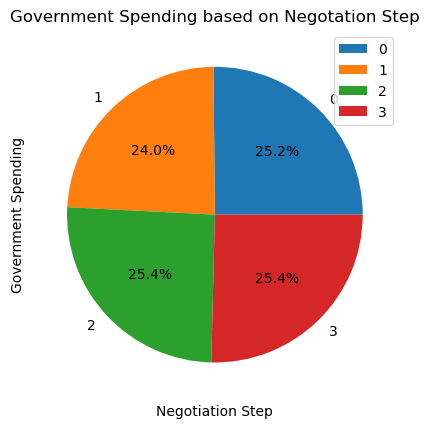

In [261]:
max_govspend.plot(x = 'Step_Nego', y = 'Gov_Spending', kind = 'pie',autopct='%1.1f%%')
plt.title('Government Spending based on Negotation Step')
plt.xlabel('Negotiation Step')
plt.ylabel('Government Spending')
plt.show()

In [280]:
df['Public_Debt_rate_GDP'].min()

0.1

In [281]:
df['Public_Debt_rate_GDP'].max()

236.4

In [266]:
236.4/5

47.28

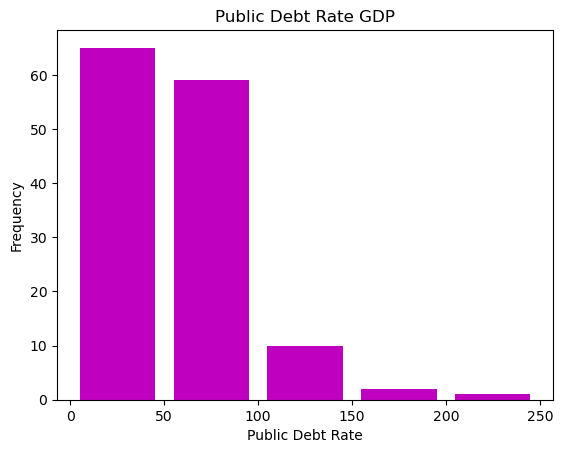

In [282]:
df['Public_Debt_rate_GDP'].plot(kind='hist', bins=[0, 50, 100, 150, 200, 250], color = 'm', rwidth=0.8)
plt.title('Public Debt Rate GDP')
plt.xlabel('Public Debt Rate')
plt.ylabel('Frequency')
plt.show()

# Question 4

### a) Supervised Machine Learning

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [271]:
df.head()

,ID_Num,Country,Region,IFM_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,...,Unnamed: 0,index,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.0,Afghanistan,Asia-Pacific,0.0,Step4,80.300000,49.2,76.7,10.0,35.5,...,153,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,2.0,Albania,Europe,1.0,Step1,73.900000,69.3,81.5,70.0,2.9,...,106,106,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,3.0,Algeria,Middle East and North Africa,0.0,Step4,48.700000,61.6,74.9,30.0,41.5,...,87,87,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,5.0,Argentina,Americas,0.0,Step2,49.500000,56.4,60.2,55.0,44.1,...,46,46,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,6.0,Armenia,Europe,1.0,Step2,45.211905,78.3,77.8,75.0,3.0,...,115,115,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [289]:
X = df[['Business_Freedom','Investment_Freedom','Freedom to make life choices','Social support']]
y = df['IFM_Nigo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 117)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))

Accuracy:  0.9047619047619048
Precision:  0.8888888888888888


In [290]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

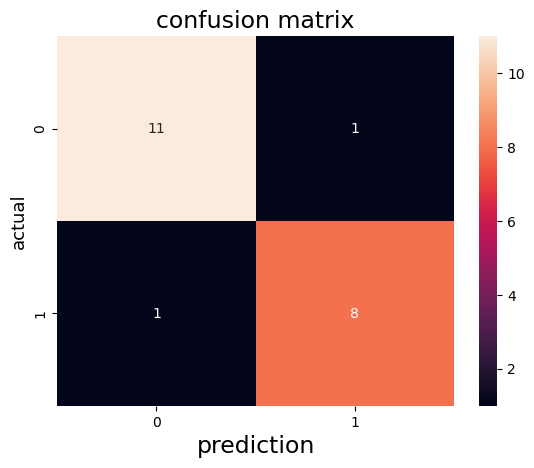

In [291]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['0','1'],yticklabels=['0','1'])
plt.ylabel("actual",fontsize=13)
plt.xlabel("prediction",fontsize=17)
plt.title('confusion matrix',fontsize=17)
plt.show()

In [292]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)


Intercept: 
 [-13.22086432]
Coefficients: 
 [[0.08858522 0.11213351 0.78878694 0.52709869]]


In [294]:
import statsmodels.api as sm
X= sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.261400
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               IFM_Nigo   No. Observations:                  137
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.6217
Time:                        11:20:53   Log-Likelihood:                -35.812
converged:                       True   LL-Null:                       -94.665
Covariance Type:            nonrobust   LLR p-value:                 1.649e-24
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -17.8249      3.260     -5.468      0.000

We use a logistic regression model because we want to classify as 1 or 0 for the IFM negotiation decision. If the IFM decide (1) to enter negotiation or not (0).

#choice of variables
We chose 4 variables (2 economics and 2 happinesse) : Business Freedom, Investment Freedom, Freedom to make life choices, Social support. 1 of each is not significative enough so we went for 2 of each. These variables seems to most important in actual aspect of the IFM decisions making.

#results interpretation
We have an accuracy of 0.90 and precision of 0.89. We have one False positive and one false negative.

### b) Unsupervised Machine Learning

In [295]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [296]:
kmeans_data = df[['Gov_Spending','Generosity']]
x = kmeans_data['Gov_Spending']
y = kmeans_data['Generosity']

In [297]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kmeans_data)
    distortions.append(kmeanModel.inertia_)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

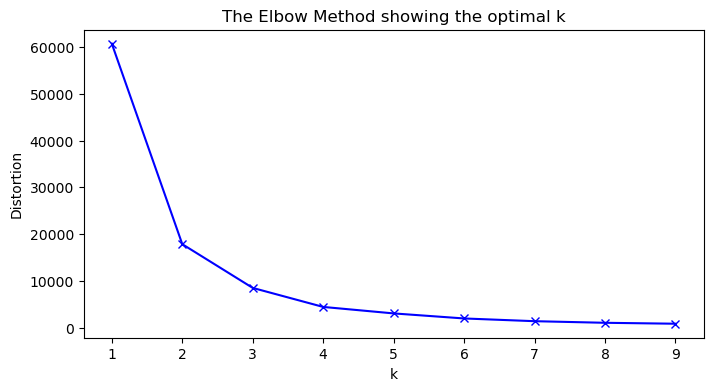

In [298]:
    plt.figure(figsize=(8,4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [299]:
kmeans = KMeans(n_clusters=3).fit(kmeans_data)
centroids = kmeans.cluster_centers_

print(centroids)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[55.78099817  0.17057692]
 [82.54057971  0.19781159]
 [24.30625     0.149875  ]]


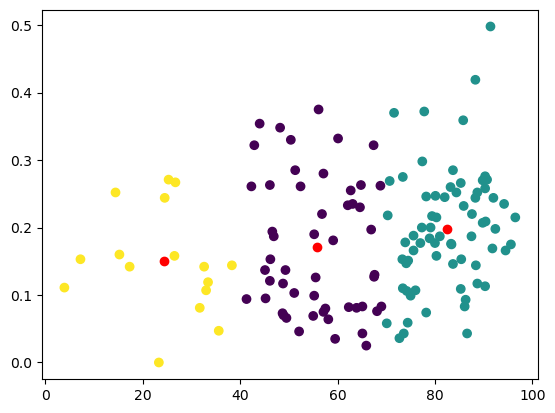

In [301]:
plt.scatter(x, y, c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c ='red')

In [308]:
kmeans_data['clusters'] = kmeans.fit_predict(kmeans_data)
kmeans_data

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\3842156806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_data['clusters'] = kmeans.fit_predict(kmeans_data)


,Gov_Spending,Generosity,clusters
0,80.300000,0.158,0
1,73.900000,0.178,0
2,48.700000,0.073,2
3,49.500000,0.066,2
4,45.211905,0.095,2
...,...,...,...
132,67.400000,0.322,2
133,58.100000,0.064,2
134,74.100000,0.147,0
135,80.100000,0.247,0


In [310]:
grouped_data = kmeans_data.groupby('clusters').describe()
grouped_data

Gov_Spending                                                        \
                count       mean        std   min     25%   50%   75%   max   
clusters                                                                      
0                69.0  82.540580   7.147445  70.1  76.000  83.3  88.4  96.5   
1                16.0  24.306250  10.187801   3.9  16.775  25.9  32.7  38.3   
2                52.0  55.780998   8.307649  41.3  48.775  55.8  63.3  69.0   

         Generosity                                                           
              count      mean       std    min      25%    50%    75%    max  
clusters                                                                      
0              69.0  0.197812  0.088661  0.036  0.14700  0.188  0.247  0.498  
1              16.0  0.149875  0.077506  0.000  0.11000  0.143  0.181  0.271  
2              52.0  0.170577  0.100006  0.025  0.08175  0.137  0.261  0.375

Cluster 0 has the most data point and cluster 1 has the least.
Cluster 0 has the lowest Standard deviation in Gov_Spending and the second in Generosity
Cluster 1 has the lowest data points, cluster 0 is highest and cluster 2 is in-between the two.
The more the Generosity ratio, the more the Governement ratio.